In [1]:
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline


# Prius 全ての統計

In [2]:
client = MongoClient()
db = client['CARSENSOR']
collection = db['PRIUS']

col = collection.find()
df = pd.DataFrame(list(col))

In [3]:
a = df[['base_price', 'distance', 'model_year']].dropna()
a['base_price'] /= 10000

In [4]:
df['camera'].unique()

array([0, '－/－/バック', 'フロント/－/バック', '－/サイド/バック', 'フロント/サイド/バック'],
      dtype=object)

In [7]:
x = df[['distance', 'model_year', 'navi', 'camera', 'AS_sensor', 'cruise']]
y = df[['base_price']]



In [4]:
years = a['model_year'].unique()
years.sort()
med = []
for y in years:
    m = a[a['model_year']==y].median()
    med.append(m['base_price'])


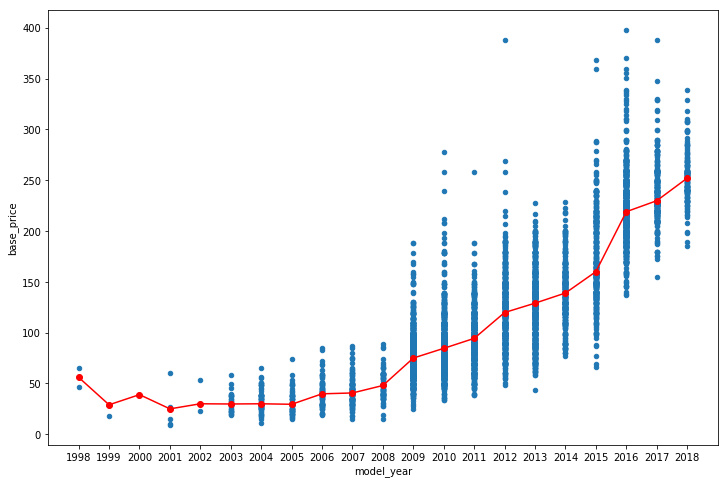

In [6]:
b = pd.Series(med, index=years)
ax = a.plot(kind='scatter', x='model_year', y='base_price', xticks=years, figsize=(12, 8))
b.plot(marker='o', color='red', ax=ax)

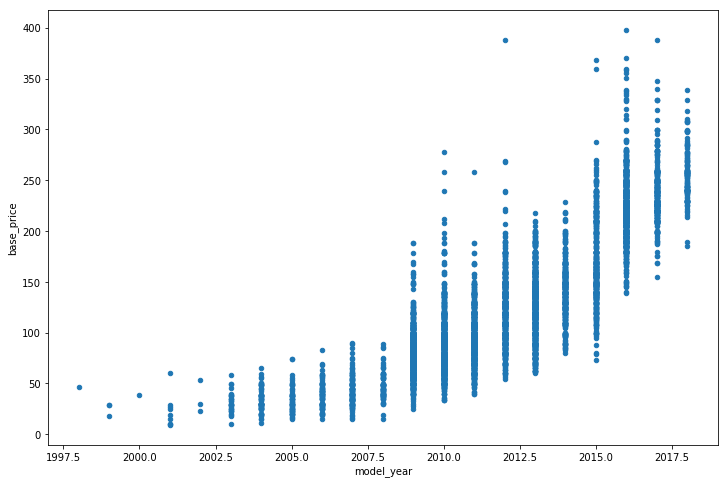

In [3]:
a = df[['base_price', 'distance', 'model_year']].dropna()
a['base_price'] /= 10000
a.plot.scatter(x='model_year', y='base_price', figsize=(12, 8))

In [14]:
mat = df[['distance', 'base_price']].dropna()
mat = mat.values

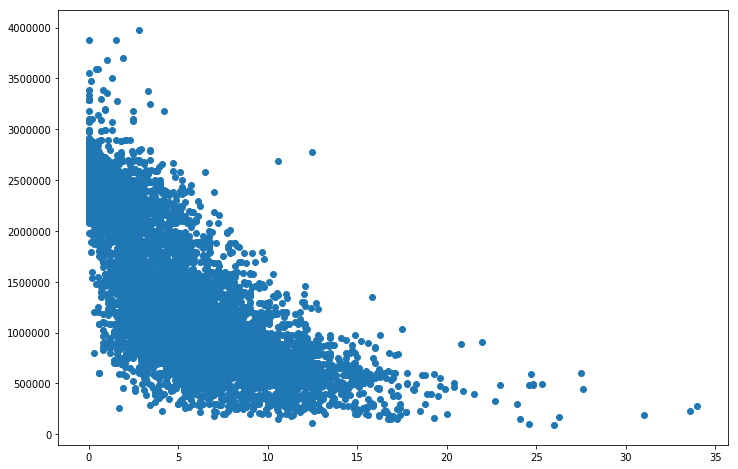

In [20]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.scatter(mat[:, 0], mat[:, 1])

In [33]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x = mat[:, 0].reshape(-1, 1)
y = mat[:, 1].reshape(-1, 1)
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

(0, 5000000)

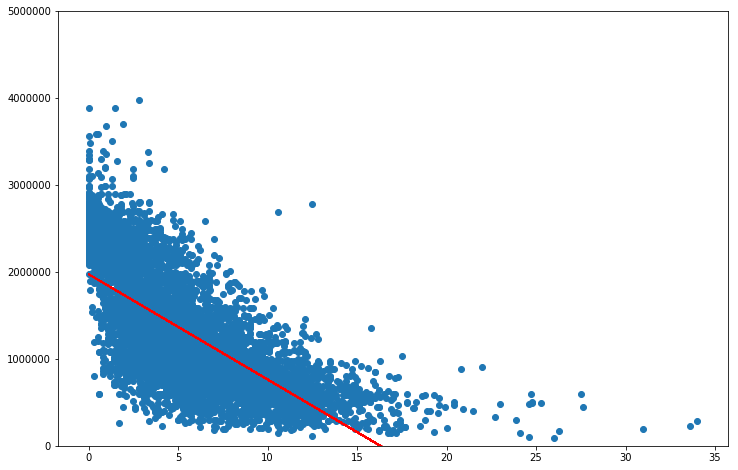

In [39]:
px = x
py = reg.predict(px)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.scatter(mat[:, 0], mat[:, 1])
ax.plot(px, py, color='red')
ax.set_ylim([0, 5000000])

In [5]:
df['model_year'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2004, 2006, 2005, 2003, 2002, 2001, 1999, 1998, 2000],
      dtype=int64)

In [8]:
collection.find_one({'model_year':2012, 'base_price':{'$gte':3500000}})

{'_id': ObjectId('5bc24667b2bf2462c49c962b'),
 'url': 'https://www.carsensor.net/usedcar/detail/CU7659569678/index.html?TRCD=200002',
 'base_price': 3880000,
 'total_price': 4015000,
 'model_year': 2012,
 'distance': 1.5,
 'repare': 'なし',
 'inspection': '2019(H31)年4月',
 'info': "1.8 S ツーリングセレクション G's リラックスC （パール）",
 'drive': '2WD',
 'recycle': 'リ済別',
 'legal_maintenance': '法定整備付',
 'warranty': '保証付：販売店保証 保証期間：3ヵ月 保証距離：3,000km',
 'one_owner': 0,
 'record_book': 1,
 'no_smoke': 0,
 'key': 'CU7659569678',
 'region': '東京都',
 'keyless': 1,
 'smartkey': 1,
 'navi': 'メモリー他',
 'TV': 'ワンセグ',
 'video': 'DVD/－',
 'audio': 'CD/－/－',
 'player': 1,
 'monitor': 0,
 'ETC': 1,
 'sheat_air': 0,
 'sheat_heater': 0,
 'idling_stop': 1,
 'AS_sensor': 0,
 'cruise': 0,
 'ABS': 1,
 'ESC': 1,
 'anti_theft': 1,
 'auto_brake': 0,
 'parking_assist': 0,
 'airbag': '運転席/助手席/サイド/カーテン',
 'headlight': 'ディスチャージドランプ',
 'camera': '－/－/バック',
 'around_camera': 0,
 'aero': 1,
 'alumi_wheel': 1,
 'lowdown': 0,
 'liftup': 0,
 

In [24]:
list(collection.find({'model_year':2018, 'base_price':{'$lte':2000000}}))

[{'_id': ObjectId('5ba8b86fb2bf244ea0e92b55'),
  'url': 'https://www.carsensor.net/usedcar/detail/CU8708738975/index.html?TRCD=200002',
  'base_price': 1890000,
  'total_price': 2065000,
  'model_year': 2018,
  'distance': 0.2,
  'inspection': '車検整備付',
  'info': '1.8 S セーフティ プラス モデリスタエアロ ナビ （ブラック）',
  'recycle': 'リ済別',
  'legal_maintenance': '法定整備付',
  'warranty': '保証付：販売店保証 保証期間：1年 保証距離：無制限',
  'one_owner': 0,
  'record_book': 0,
  'no_smoke': 0,
  'key': 'CU8708738975',
  'region': '埼玉県'},
 {'_id': ObjectId('5ba8b87eb2bf244ea0e92b5e'),
  'url': 'https://www.carsensor.net/usedcar/detail/CU8669366486/index.html?TRCD=200002',
  'base_price': 1850000,
  'total_price': 2023000,
  'model_year': 2018,
  'distance': 0.6,
  'inspection': '車検整備付',
  'info': '1.8 S セーフティ プラス モデリスタエアロ ナビ （ブラック）',
  'recycle': 'リ済別',
  'legal_maintenance': '法定整備付',
  'warranty': '保証付：販売店保証 保証期間：1年 保証距離：無制限',
  'one_owner': 0,
  'record_book': 0,
  'no_smoke': 0,
  'key': 'CU8669366486',
  'region': '埼玉県'}]

1998 1
1999 3
2000 1
2001 9
2002 3
2003 31
2004 70
2005 62
2006 86
2007 119
2008 76
2009 1008
2010 996
2011 840
2012 735
2013 946
2014 387
2015 465
2016 1001
2017 392
2018 140


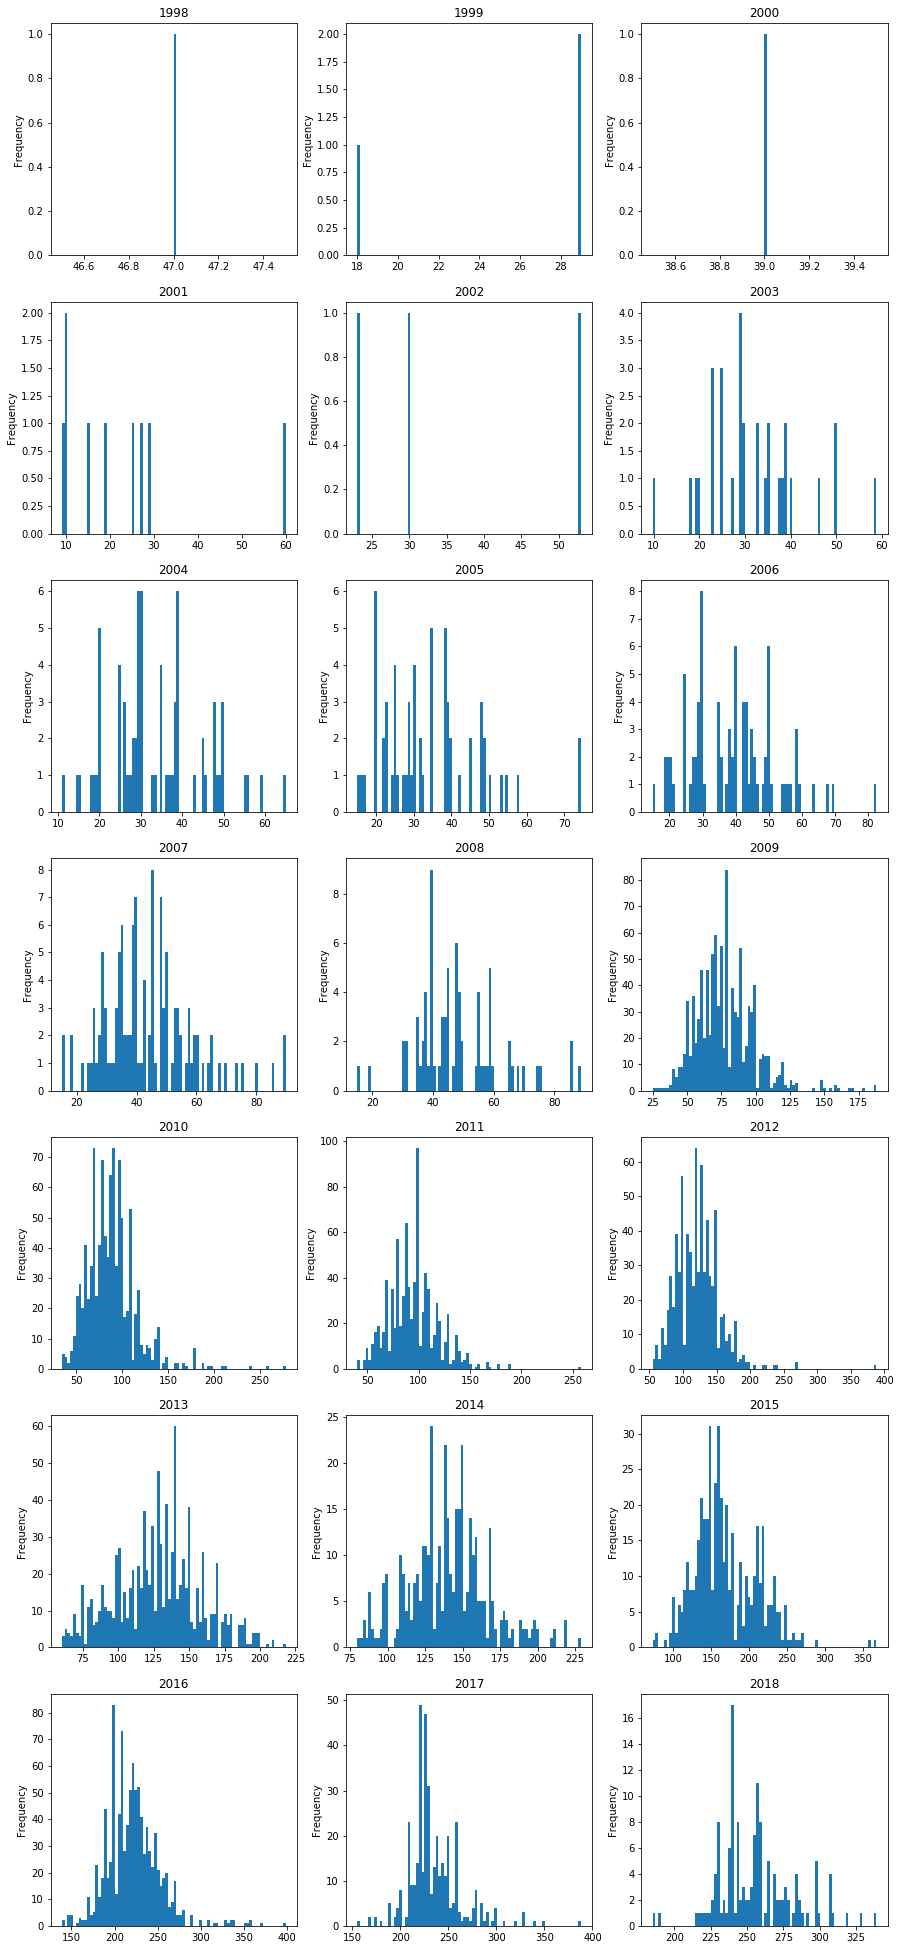

In [7]:
a = df[['base_price', 'distance', 'model_year']].dropna()
# grouped = a.groupby('model_year')
num_models = len(a['model_year'].unique())

fig, axes = plt.subplots(math.ceil(num_models / 3), 3, figsize=(15, 35))
for (ax, (key, group)) in zip(axes.flatten(), a.groupby('model_year')):
    print(key, len(group))
    group= group['base_price'] / 10000
    ax = group.plot.hist(ax=ax, bins=80)
    ax.set_title(key)

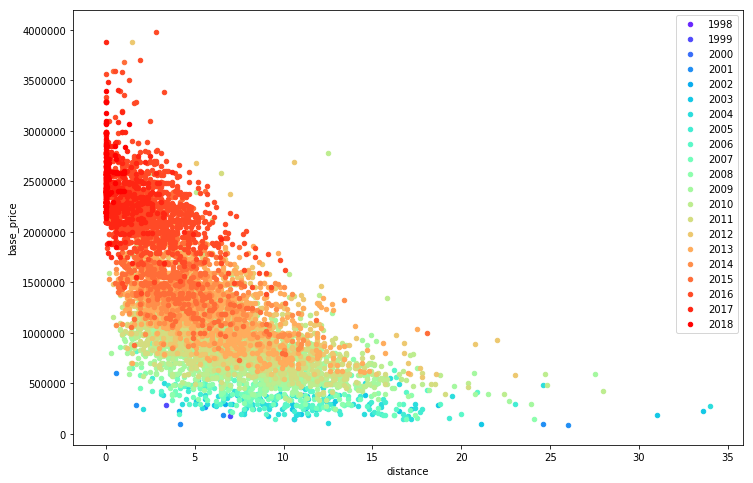

In [8]:
fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / float(num_models)) for c in np.arange(1, num_models + 1)]
ax = fig.add_subplot(1, 1, 1)
for (i, (key, group)) in enumerate(a.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)


# Prius 修復歴あり

In [9]:
client = MongoClient()
db = client['CARSENSOR']
collection = db['Prius']

col = collection.find()
df = pd.DataFrame(list(col))

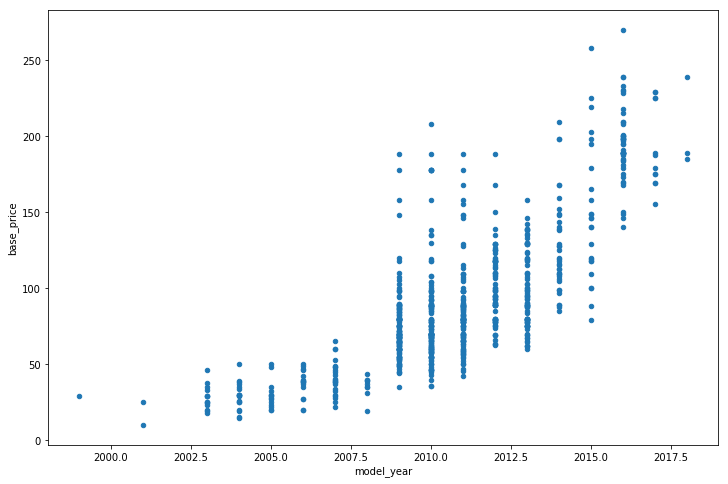

In [28]:
repared = df[df['repare'] == 'あり']
a = repared[['base_price', 'distance', 'model_year']].dropna()
a['base_price'] /= 10000
a.plot.scatter(x='model_year', y='base_price', figsize=(12, 8))

1999 1
2001 2
2003 14
2004 18
2005 14
2006 16
2007 23
2008 9
2009 138
2010 141
2011 112
2012 80
2013 87
2014 37
2015 25
2016 48
2017 12
2018 3


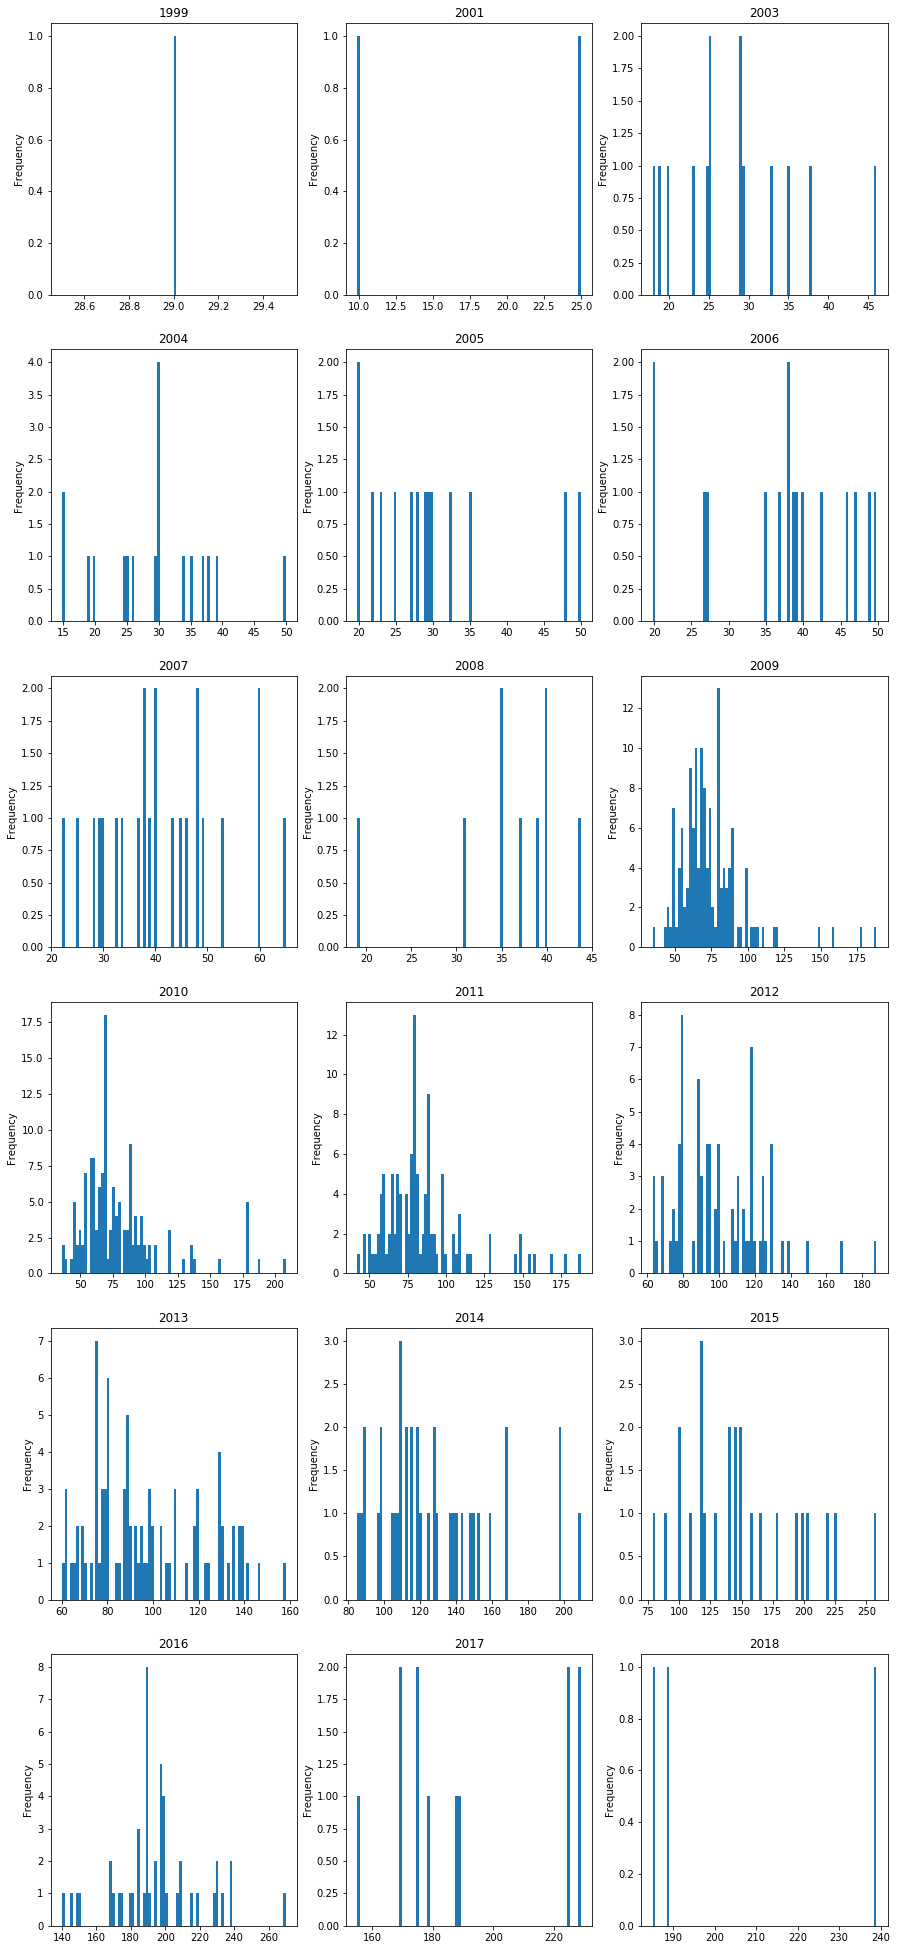

In [29]:
a = repared[['base_price', 'distance', 'model_year']].dropna()
# grouped = a.groupby('model_year')
num_models = len(a['model_year'].unique())

fig, axes = plt.subplots(math.ceil(num_models / 3), 3, figsize=(15, 35))
for (ax, (key, group)) in zip(axes.flatten(), a.groupby('model_year')):
    print(key, len(group))
    group= group['base_price'] / 10000
    ax = group.plot.hist(ax=ax, bins=80)
    ax.set_title(key)

1998 1
1999 2
2000 1
2001 7
2002 3
2003 17
2004 52
2005 48
2006 70
2007 96
2008 67
2009 870
2010 855
2011 728
2012 655
2013 859
2014 350
2015 440
2016 953
2017 380
2018 137


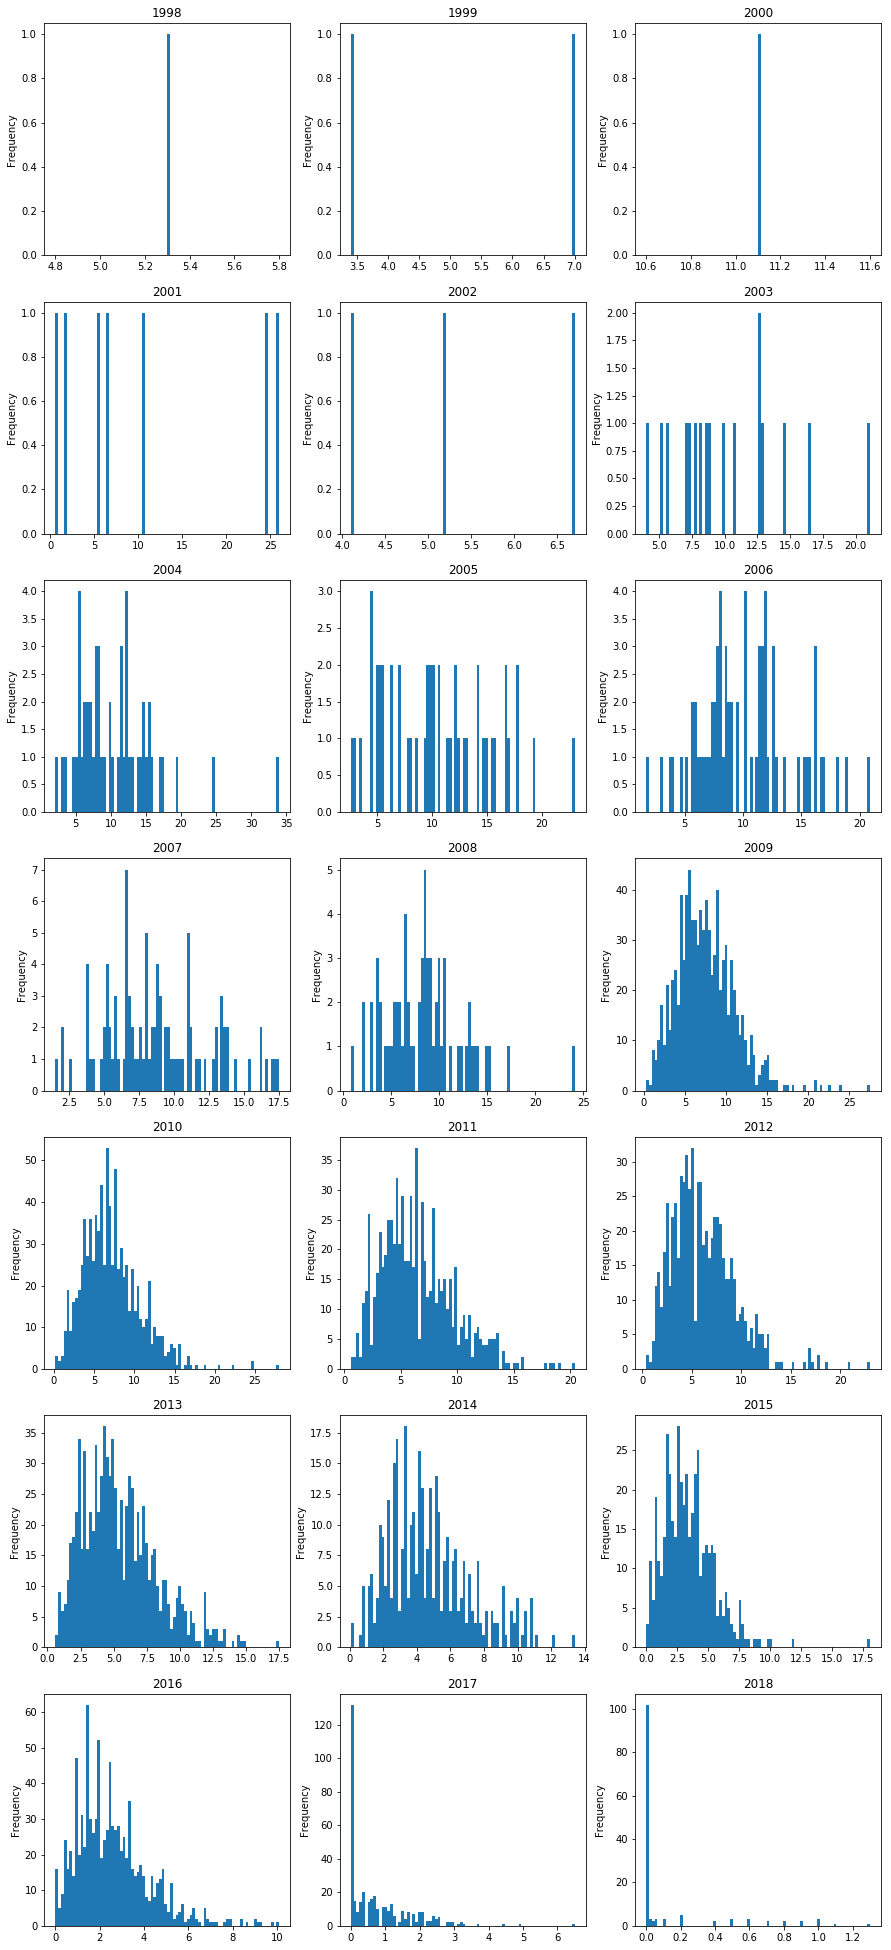

In [31]:
a = non_repared[['base_price', 'distance', 'model_year']].dropna()
# grouped = a.groupby('model_year')
num_models = len(a['model_year'].unique())

fig, axes = plt.subplots(math.ceil(num_models / 3), 3, figsize=(15, 35))
for (ax, (key, group)) in zip(axes.flatten(), a.groupby('model_year')):
    print(key, len(group))
    group= group['distance']
    ax = group.plot.hist(ax=ax, bins=80)
    ax.set_title(key)

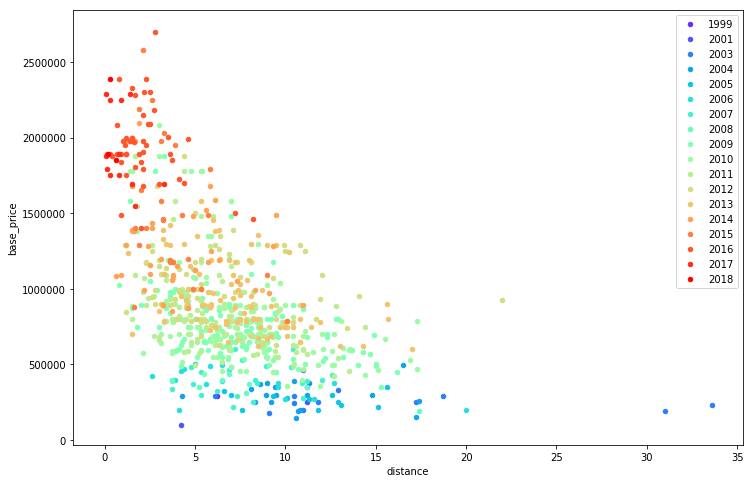

In [17]:
fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / float(num_models)) for c in np.arange(1, num_models + 1)]
ax = fig.add_subplot(1, 1, 1)
for (i, (key, group)) in enumerate(a.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)

# Prius 修復歴なし

In [18]:
client = MongoClient()
db = client['CARSENSOR']
collection = db['Prius']

col = collection.find()
df = pd.DataFrame(list(col))

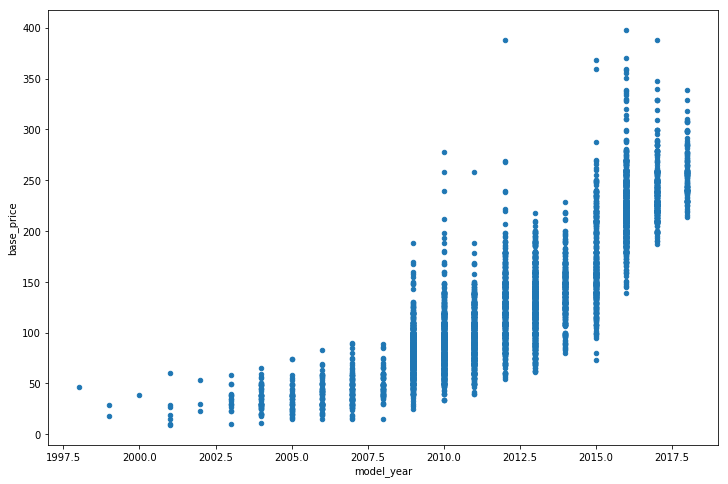

In [20]:
non_repared = df[df['repare'] == 'なし']
a = non_repared[['base_price', 'distance', 'model_year']].dropna()
a['base_price'] /= 10000
a.plot.scatter(x='model_year', y='base_price', figsize=(12, 8))

1998 1
1999 2
2000 1
2001 7
2002 3
2003 17
2004 52
2005 48
2006 70
2007 96
2008 67
2009 870
2010 855
2011 728
2012 655
2013 859
2014 350
2015 440
2016 953
2017 380
2018 137


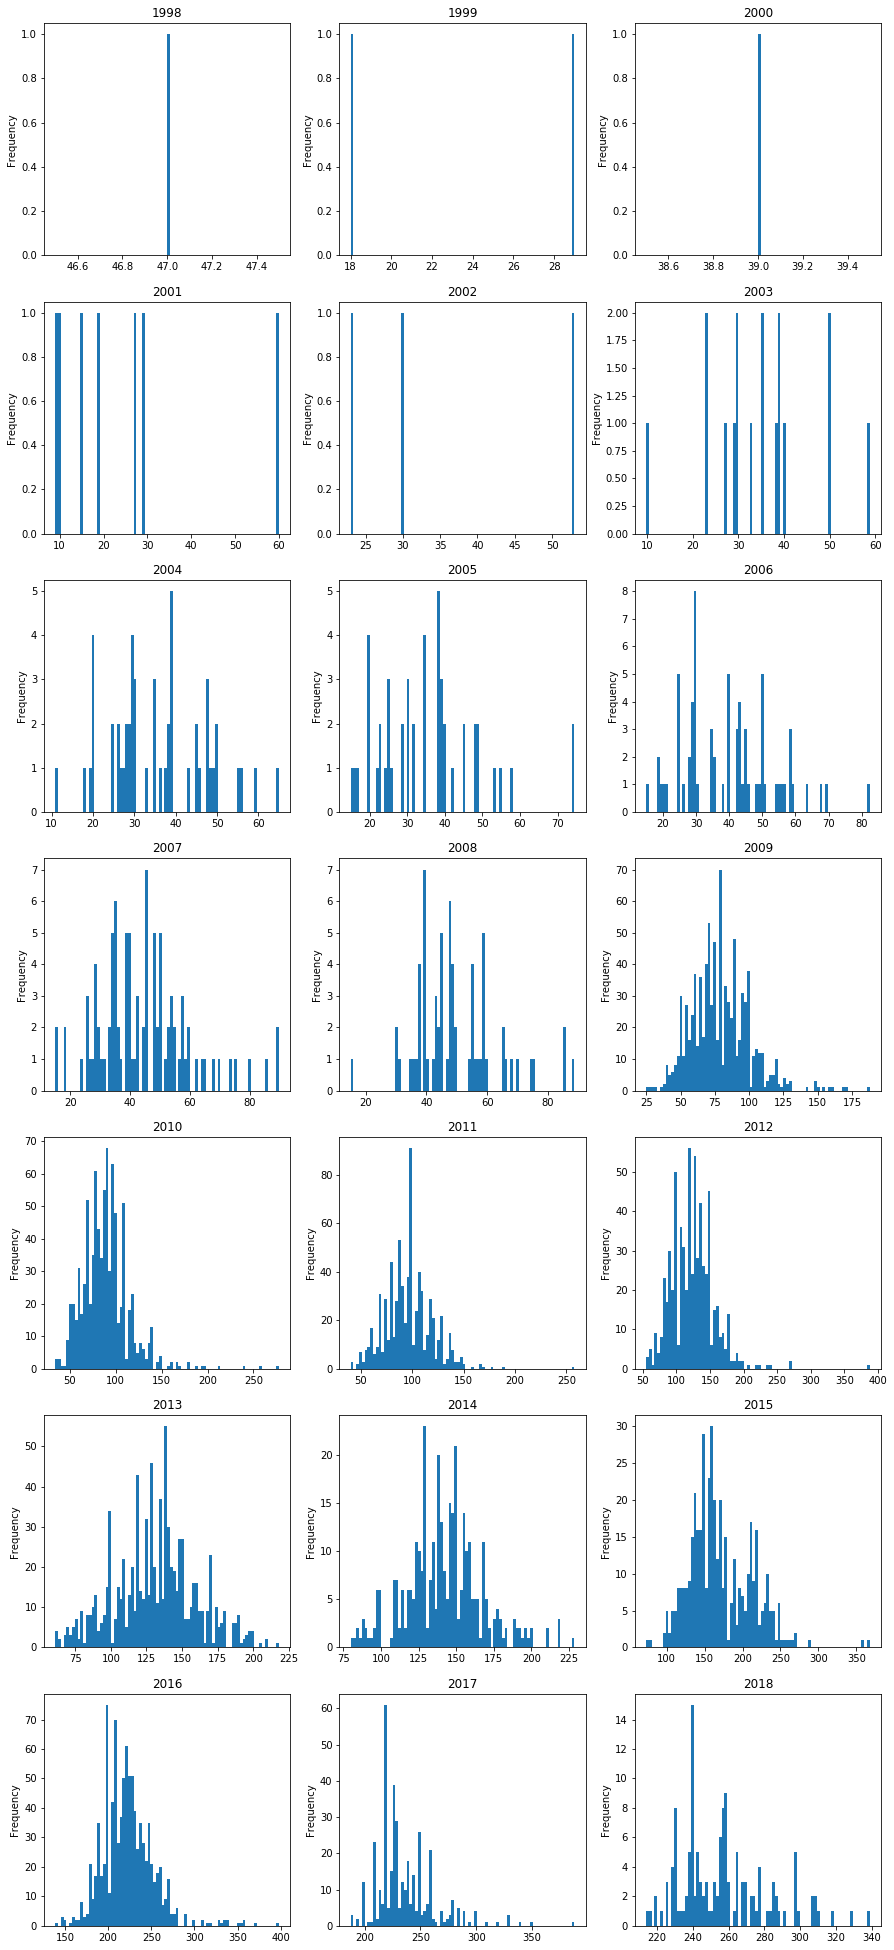

In [21]:
a = non_repared[['base_price', 'distance', 'model_year']].dropna()
# grouped = a.groupby('model_year')
num_models = len(a['model_year'].unique())

fig, axes = plt.subplots(math.ceil(num_models / 3), 3, figsize=(15, 35))
for (ax, (key, group)) in zip(axes.flatten(), a.groupby('model_year')):
    print(key, len(group))
    group= group['base_price'] / 10000
    ax = group.plot.hist(ax=ax, bins=80)
    ax.set_title(key)

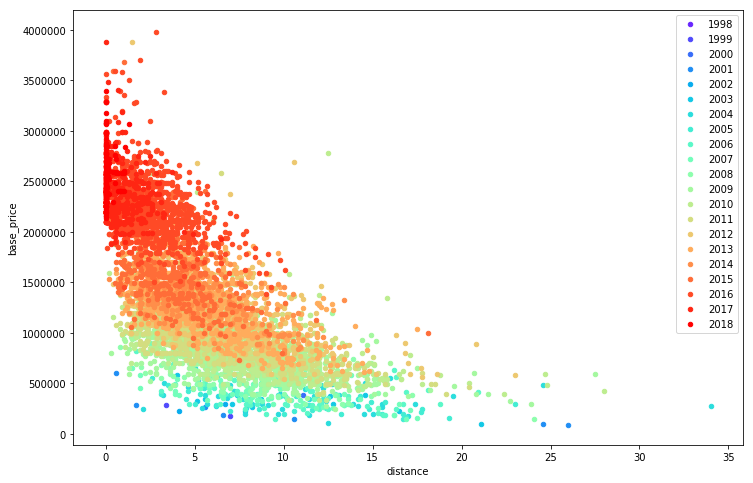

In [22]:
fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / float(num_models)) for c in np.arange(1, num_models + 1)]
ax = fig.add_subplot(1, 1, 1)
for (i, (key, group)) in enumerate(a.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)

1998 1
1999 2
2000 1
2001 7
2002 3
2003 17
2004 52
2005 48
2006 70
2007 96
2008 67
2009 870
2010 855
2011 728
2012 655
2013 859
2014 350
2015 440
2016 953
2017 380
2018 137


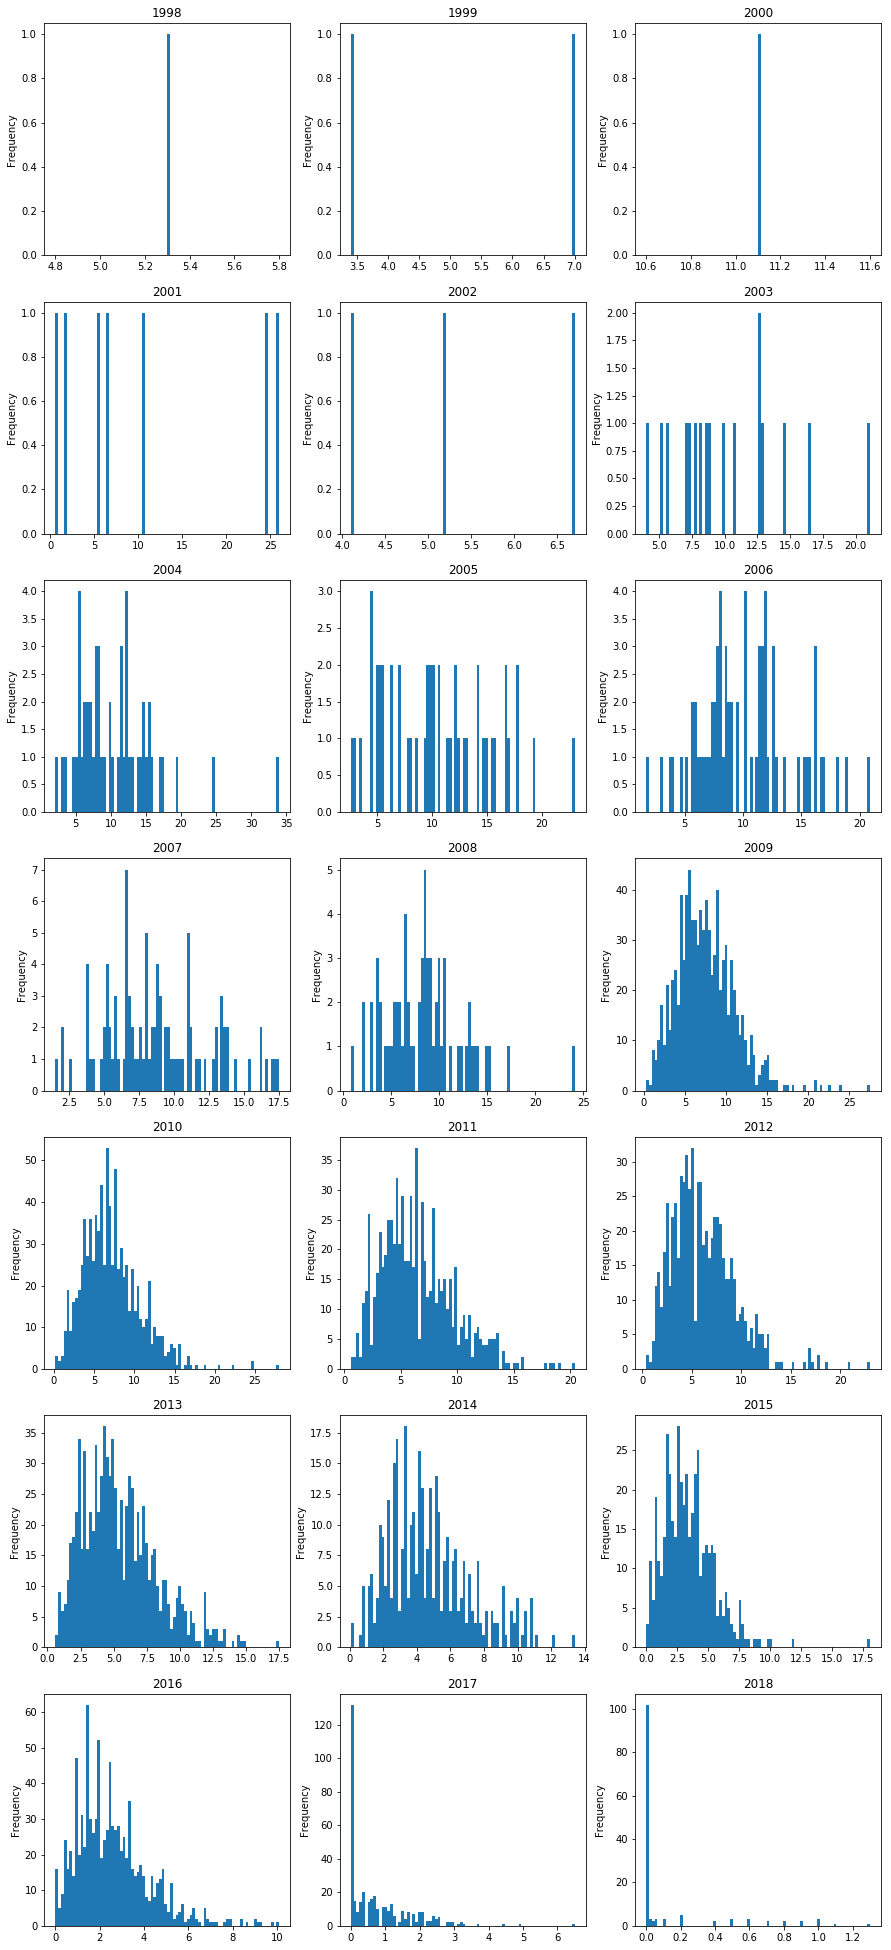

In [23]:
a = non_repared[['base_price', 'distance', 'model_year']].dropna()
# grouped = a.groupby('model_year')
num_models = len(a['model_year'].unique())

fig, axes = plt.subplots(math.ceil(num_models / 3), 3, figsize=(15, 35))
for (ax, (key, group)) in zip(axes.flatten(), a.groupby('model_year')):
    print(key, len(group))
    group= group['distance']
    ax = group.plot.hist(ax=ax, bins=80)
    ax.set_title(key)

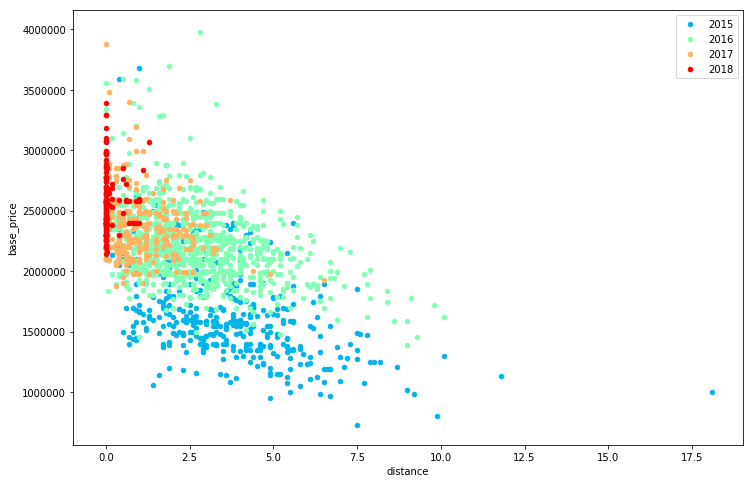

In [34]:
b = a[a['model_year'] > 2014]
b = b[b['model_year'] < 2019]

fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / 4) for c in np.arange(1, 5)]
ax = fig.add_subplot(1, 1, 1)
for (i, (key, group)) in enumerate(b.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)

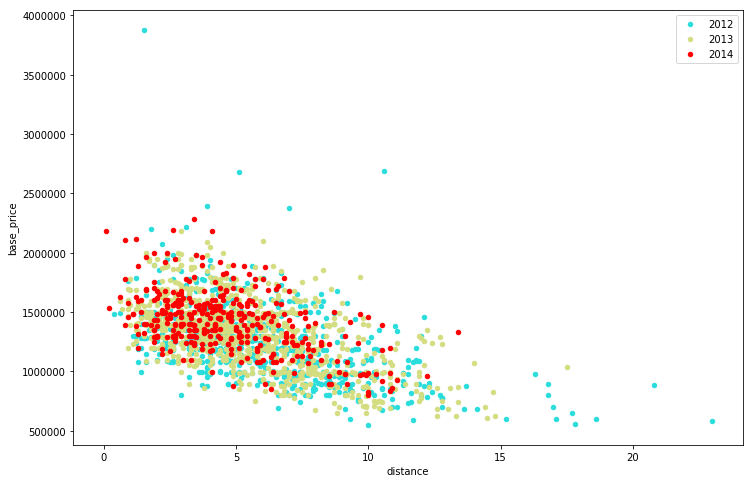

In [26]:
b = a[a['model_year'] > 2011]
b = b[b['model_year'] < 2015]

fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / 3) for c in np.arange(1, 4)]
ax = fig.add_subplot(1, 1, 1)
for (i, (key, group)) in enumerate(b.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)

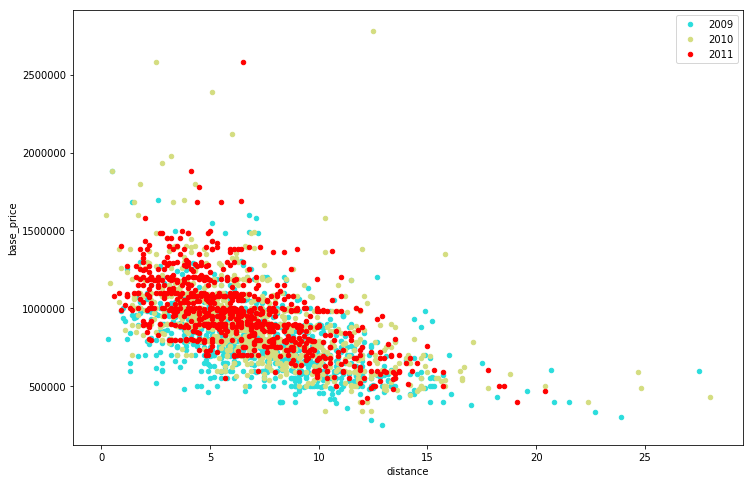

In [27]:
b = a[a['model_year'] > 2008]
b = b[b['model_year'] < 2012]

fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / 3) for c in np.arange(1, 4)]
ax = fig.add_subplot(1, 1, 1)
for (i, (key, group)) in enumerate(b.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)

<Figure size 864x576 with 0 Axes>

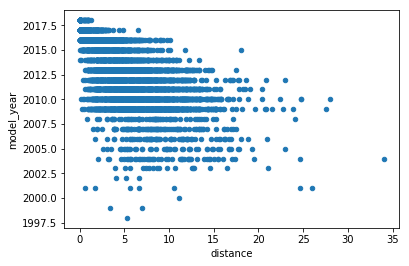

In [32]:
fig = plt.figure(figsize=(12, 8))
a.plot.scatter(x='distance', y='model_year')

# Fit 全ての統計

In [34]:
client = MongoClient()
db = client['CARSENSOR']
collection = db['Fit']

col = collection.find()
df = pd.DataFrame(list(col))

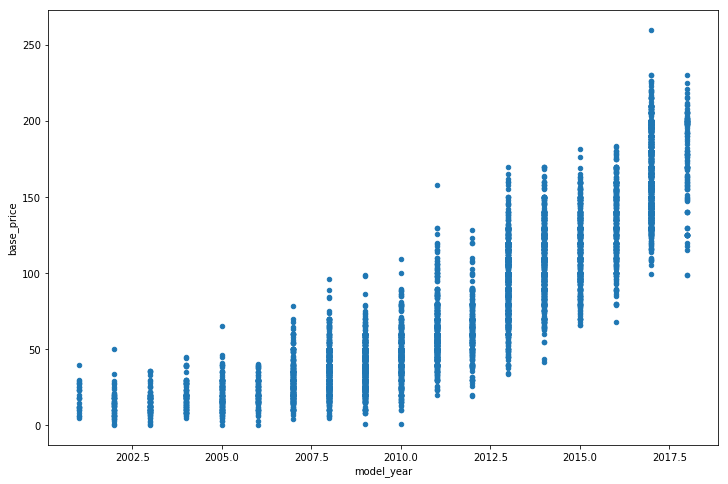

In [35]:
a = df[['base_price', 'distance', 'model_year']].dropna()
a['base_price'] /= 10000
a.plot.scatter(x='model_year', y='base_price', figsize=(12, 8))

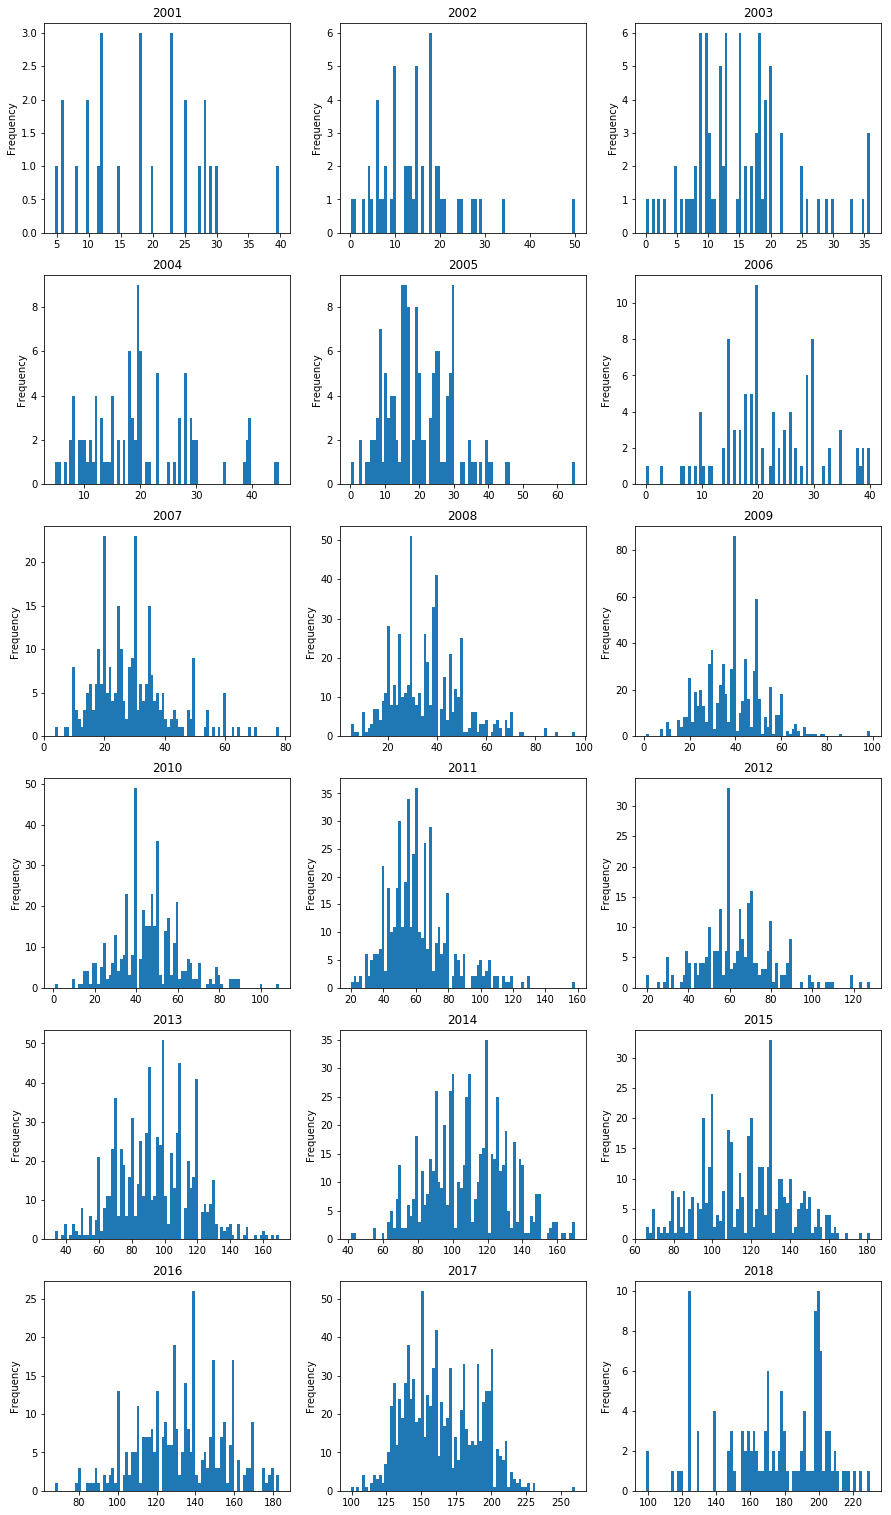

In [38]:
a = df[['base_price', 'distance', 'model_year']].dropna()
# grouped = a.groupby('model_year')
fig, axes = plt.subplots(6, 3, figsize=(15, 27))
for (ax, (key, group)) in zip(axes.flatten(), a.groupby('model_year')):
#     print(key, len(group))
    group= group['base_price'] / 10000
    ax = group.plot.hist(ax=ax, bins=80)
    ax.set_title(key)

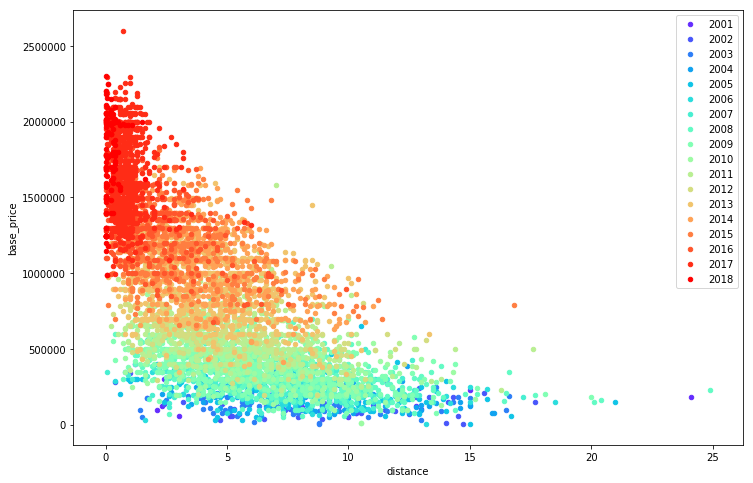

In [37]:
fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / 18.0) for c in np.arange(1, 19)]
ax = fig.add_subplot(1, 1, 1)
for (i, (key, group)) in enumerate(a.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)


In [18]:
err = collection.find({'distance': {'$gt': 20}})
for e in err:
    print(e['url'])

https://www.carsensor.net/usedcar/detail/CU8535350468/index.html?TRCD=200002


In [30]:
collection.update_one({'key': 'CU8468400679'}, {'$set': {'base_price': None}})

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  """Entry point for launching an IPython kernel.


{'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}

In [31]:
for e in collection.find({'base_price': None}):
    print(e)

{'_id': ObjectId('5b812dd7b2bf2437e0a782fb'), 'url': 'https://www.carsensor.net/usedcar/detail/CU8468400679/index.html?TRCD=200002', 'base_price': None, 'total_price': None, 'model_year': 2015, 'distance': 0.9, 'inspection': '車検整備付', 'info': '1.5 ハイブリッド Z 衝突軽減ナビDVD禁煙ETCフォグ （パールホワイト）', 'recycle': 'リ済別', 'legal_maintenance': '法定整備付', 'warranty': '保証付：販売店保証 保証期間：4ヵ月 保証距離：3,000km', 'one_owner': 1, 'record_book': 1, 'no_smoke': 1, 'key': 'CU8468400679'}
